In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import * 

In [3]:
path = Path('/home/jupyter/chat-data')

In [13]:
path.ls()

[PosixPath('/home/jupyter/chat-data/human-chat.json'),
 PosixPath('/home/jupyter/chat-data/data_tolokers.json')]

### Chat data thanks to https://github.com/DeepPavlov/convai/tree/master/data
Used data_tolokers.json -- data collected during DeepHack.Chat hackathon in July 2-8 2018 via Yandex.Toloka service (paid workers). 3127 dialogues.

In [6]:
df = pd.read_json(path/'data_tolokers.json')

In [10]:
pd.set_option('max_colwidth', -1)

In [12]:
df.head(3)

,bot_profile,dialog,end_time,eval_score,participant1_id,participant2_id,profile_match,start_time,user_profile
0,"[i have amazing children and grandchildren., i can sew my own clothes., i had cancer but its gone now., i am retired and living the great life., i do not have a smartphone.]","[{'id': 0, 'sender': 'participant2', 'text': 'I love iphone! i just bought new iphone!', 'evaluation_score': None, 'sender_class': 'Bot'}, {'id': 1, 'sender': 'participant1', 'text': 'Thats good for you, i'm not very into new tech', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 2, 'sender': 'participant2', 'text': 'I am a college student and i am a college student', 'evaluation_score': None, 'sender_class': 'Bot'}, {'id': 3, 'sender': 'participant1', 'text': 'I am go to gym and live on donations', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 4, 'sender': 'participant2', 'text': 'I am a vegan and i am in the midwest', 'evaluation_score': None, 'sender_class': 'Bot'}, {'id': 5, 'sender': 'participant1', 'text': 'So vegan... i have dogs maybe i should told then that they may eat cheap salads insted of meat', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 6, 'sender': 'participant2', 'text': 'I would not mind having them in the office that would be hard for me', 'evaluation_score': None, 'sender_class': 'Bot'}, {'id': 7, 'sender': 'participant1', 'text': 'Dogs or vegan in office?', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 8, 'sender': 'participant2', 'text': 'I am a vegetarian so i am vegan', 'evaluation_score': None, 'sender_class': 'Bot'}, {'id': 9, 'sender': 'participant1', 'text': 'Strange answer', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 10, 'sender': 'participant2', 'text': 'I guess i just do not know what to ps4 experience with.', 'evaluation_score': None, 'sender_class': 'Bot'}]",2018-07-04 08:36:55.484,1.0,"{'class': 'User', 'user_id': 'User 00686'}","{'class': 'Bot', 'user_id': 'Bot 002'}",0,2018-07-04 08:34:51.235,"[two dogs live with me., i like doing the treadmill and rowing machine., eating is something i do when i'm bored., i have short hair., i go to the gym regularly.]"
1,"[my father was a door to door salesman., i've three dogs., i am in an open polyamorous relationship., i also have a dog walking business.]","[{'id': 0, 'sender': 'participant1', 'text': 'Hello', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 1, 'sender': 'participant1', 'text': '/test', 'evaluation_score': None, 'sender_class': 'Human'}]",2018-07-04 09:18:35.000,1.0,"{'class': 'User', 'user_id': 'User 00544'}","{'class': 'Bot', 'user_id': 'Bot 006'}",1,2018-07-04 09:18:28.000,"[if i'm not cooking in the kitchen then i'm definitely on the water., spiderman is my favorite., hey my name is larry and i am a chef., l also love comic books., i love cooking but i also enjoy fishing.]"
2,"[i am a gold medalist olympian., i love italian food and garlic bread., my favorite color is yellow., gymnastics is my favorite sport., i workout four hours a day.]","[{'id': 0, 'sender': 'participant1', 'text': 'Hey', 'evaluation_score': None, 'sender_class': 'Human'}, {'id': 1, 'sender': 'participant1', 'text': 'What do you do?', 'evaluation_score': None, 'sender_class': 'Human'}]",2018-07-04 09:20:52.000,1.0,"{'class': 'User', 'user_id': 'User 00544'}","{'class': 'Bot', 'user_id': 'Bot 005'}",1,2018-07-04 09:20:35.000,"[i've a german shepherd dog., i live is a rural farming community., my husband is adopted., i like to watch nhl hockey.]"


Parsed the json outside of the notebook to pull just the human chats

In [14]:
chat = df = pd.read_json(path/'human-chat.json')

In [15]:
chat.head()

,evaluation_score,id,sender,sender_class,text
0,NaN,1,participant1,Human,"Thats good for you, i'm not very into new tech"
1,NaN,3,participant1,Human,I am go to gym and live on donations
2,NaN,5,participant1,Human,So vegan... i have dogs maybe i should told then that they may eat cheap salads insted of meat
3,NaN,7,participant1,Human,Dogs or vegan in office?
4,NaN,9,participant1,Human,Strange answer


In [16]:
chat.describe()

,evaluation_score,id
count,0.0,18867.000000
mean,NaN,12.479408
std,NaN,14.337071
min,NaN,0.000000
25%,NaN,3.000000
50%,NaN,9.000000
75%,NaN,17.000000
max,NaN,175.000000


In [17]:
chat.to_csv(path/'chats.csv', index=False)

In [18]:
path.ls()

[PosixPath('/home/jupyter/chat-data/chats.csv'),
 PosixPath('/home/jupyter/chat-data/human-chat.json'),
 PosixPath('/home/jupyter/chat-data/data_tolokers.json')]

In [19]:
!head $path/'chats.csv'

evaluation_score,id,sender,sender_class,text
,1,participant1,Human,"Thats good for you, i'm not very into new tech"
,3,participant1,Human,I am go to gym and live on donations
,5,participant1,Human,So vegan... i have dogs maybe i should told then that they may eat cheap salads insted of meat
,7,participant1,Human,Dogs or vegan in office?
,9,participant1,Human,Strange answer
,0,participant1,Human,Hello
,1,participant1,Human,/test
,0,participant1,Human,Hey
,1,participant1,Human,What do you do?


In [20]:
TextLMDataBunch.from_csv??

In [21]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'chats.csv', text_cols='text')

In [22]:
data_lm

TextLMDataBunch;

Train: LabelList (15093 items)
x: LMTextList
xxbos xxmaj of course i like , why are you xxunk,xxbos mine too . listen , i must go . till next time , see you,xxbos xxmaj most of people says i m looking like xxunk xxunk xxunk,xxbos what about your xxunk ?,xxbos ihave got one sister , she is pole dancer
y: LMLabelList
,,,,
Path: /home/jupyter/chat-data;

Valid: LabelList (3774 items)
x: LMTextList
xxbos xxmaj girlfriend ?,xxbos xxmaj nice . i wanted to be programmer when i was younger,xxbos xxmaj hello , how are you ?,xxbos xxmaj okay . xxmaj do you have pets ?,xxbos xxmaj my name is xxunk , yours ?
y: LMLabelList
,,,,
Path: /home/jupyter/chat-data;

Test: None

In [23]:
data_lm.save('data_lm_export.pkl')

In [24]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [25]:
len(data_lm.vocab.itos)

2128

In [26]:
data_lm.show_batch()

idx,text
0,"are you from ? xxbos xxmaj especially hiking and climbing xxbos yeah it seems you love it xxbos xxmaj good . xxmaj bye xxbos xxmaj now i live in the city and i have a lot of time to spend with meditation . xxbos hi xxbos xxmaj so , mostly xxunk xxunk ? xxbos xxmaj my favourite color is green . xxbos nice to see uu , i m great"
1,"? what do you mean ? xxbos xxmaj and what your girlfriend think about it ? xxbos xxmaj me too ) what do you like to shop ? xxbos xxmaj are you here ? xxbos hey xxbos xxmaj oh xxmaj alaska must be cold . i live in xxmaj xxunk xxbos haha not man i am not xxbos xxmaj what do you do ? xxbos red xxbos intresting , but"
2,"him . xxmaj do you have curly hair ? xxbos xxmaj where do you work ? xxbos it is fine xxbos hi xxbos i hope u find soon a new job xxbos xxmaj hi xxbos where do you work ? xxbos xxmaj hi xxbos xxmaj no . i do nt hate orange . xxbos xxmaj hi there xxbos i have 3 children , and life is wonderfull xxbos what kind"
3,". xxmaj meat makes you nervous ! xxbos xxmaj hello xxbos i do n’t have any kids , i have two dogs lol xxbos xxmaj hello how are you ? xxbos 10 xxbos xxmaj okay . xxmaj these are nice colors . xxmaj but i do n't like orange xxbos xxmaj all my friends are skateboarders . xxmaj do you like to skate ? xxbos bye :) xxbos xxmaj nice"
4,"sad xxbos do you like swimming ? xxbos i m from turket xxbos xxunk , i do n't get it xxbos i asked about you . xxmaj are you transgender ? xxbos do you like xxunk ? xxbos i m xxunk have 5 kids xxbos xxmaj where are you from ? xxbos i was adopted at a young age to an older couple who were a pool singers . xxmaj"


In [29]:
data_lm.vocab.itos[:30]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '?',
 'you',
 'i',
 'do',
 '.',
 'a',
 'what',
 'are',
 ',',
 'is',
 'to',
 'like',
 'have',
 'your',
 'and',
 '!',
 'my',
 'how',
 'am',
 'it',
 'me']

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


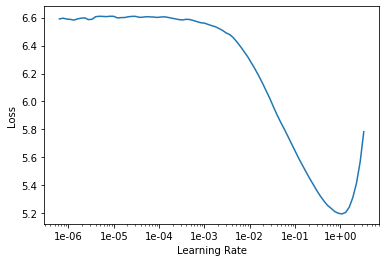

In [31]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.571713,3.907264,0.248214,00:04
1,4.263736,3.058951,0.363552,00:04
2,3.664918,2.953215,0.380006,00:04
3,3.352912,2.938353,0.381346,00:04


In [37]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.891270,2.817041,0.402966,00:05


In [41]:
learn.predict("how are you", n_words=20)

'how are you studying ? xxbos Well . xxbos Apple ? xxbos car xxbos hi xxbos my job is to be'

In [42]:
learn.predict("where can", n_words=20)

'where can i see school ? xxbos yeah there we had books just before Meeting him , male thrones were on'

In [43]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.747595,2.765686,0.413138,00:05


In [44]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.654565,2.733346,0.418272,00:05


In [45]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.585564,2.715770,0.417411,00:05
1,2.534555,2.684187,0.425096,00:05
2,2.464541,2.686106,0.426084,00:05


In [47]:
learn.predict("how are you", n_words=20)

'how are you ? xxbos You loved her ? xxbos very nice xxbos i am chocolate truck xxbos No , i'

In [48]:
learn.save('chat-lm-1')
learn.save_encoder('chat-lm-encoder-1')

In [49]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.392759,2.692924,0.427551,00:05
1,2.362530,2.699108,0.423788,00:05
2,2.288395,2.702057,0.429114,00:05
